<a href="https://colab.research.google.com/github/DilshanBotheju/CSACP_Project/blob/main/CrimeType_and_Time_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Preprocessing**

In [91]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [92]:
import numpy as np
import pandas as pd

Crime Dataset

In [93]:
#Load relevant datasets
crime_data_path = "/content/drive/MyDrive/DSGP/datasets/Baltimore_Part1_Crime_data.csv"
crime_data = pd.read_csv(crime_data_path, encoding = "latin-1")
crime_data.head()

,ï»¿X,Y,RowID,CrimeDateTime,CrimeCode,Location,Description,Inside_Outside,Weapon,Post,District,Neighborhood,Latitude,Longitude,GeoLocation,Premise,VRIName,Total_Incidents,Shape
0,1.442562e+06,590731.068662,1,2022/04/01 09:31:00+00,6G,6300 EASTERN AVE,LARCENY,NaN,NaN,232,SOUTHEAST,BAYVIEW,39.2878,-76.5399,"(39.2878,-76.5399)",NaN,NaN,1,NaN
1,1.425428e+06,599464.931734,2,2022/04/01 11:00:00+00,6J,1300 E NORTH AVE,LARCENY,NaN,NaN,312,EASTERN,EAST BALTIMORE MIDWAY,39.3120,-76.6003,"(39.312,-76.6003)",NaN,Eastern 1,1,NaN
2,1.417097e+06,588539.130322,3,2022/04/01 00:01:00+00,6D,800 CARROLL ST,LARCENY FROM AUTO,NaN,NaN,932,SOUTHERN,WASHINGTON VILLAGE/PIGTOWN,39.2821,-76.6299,"(39.2821,-76.6299)",NaN,NaN,1,NaN
3,1.431878e+06,587437.730818,4,2022/04/01 18:00:00+00,6F,2700 LIGHTHOUSE PT E,LARCENY,NaN,NaN,214,SOUTHEAST,CANTON,39.2789,-76.5777,"(39.2789,-76.5777)",NaN,NaN,1,NaN
4,1.433804e+06,593238.069583,5,2022/04/01 21:00:00+00,3GF,3300 E FAYETTE ST,ROBBERY - COMMERCIAL,NaN,HANDGUN,222,SOUTHEAST,PATTERSON PARK NEIGHBORHOOD,39.2948,-76.5708,"(39.2948,-76.5708)",NaN,NaN,1,NaN


In [94]:
# Identifying shape of the original dataset
crime_data.shape

(516635, 19)

In [95]:
# Getting a sample percentage of data to preprocess
sample_percentage = 0.5
crime_data = crime_data.sample(frac=sample_percentage, random_state=42)

In [96]:
# Identifying shape of sample dataset
crime_data.shape

(258318, 19)

In [97]:
# Analyisng crime dataset
crime_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 258318 entries, 68726 to 56339
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ï»¿X             257867 non-null  float64
 1   Y                257867 non-null  float64
 2   RowID            258318 non-null  int64  
 3   CrimeDateTime    258318 non-null  object 
 4   CrimeCode        258318 non-null  object 
 5   Location         257043 non-null  object 
 6   Description      258318 non-null  object 
 7   Inside_Outside   221340 non-null  object 
 8   Weapon           53963 non-null   object 
 9   Post             257423 non-null  object 
 10  District         257423 non-null  object 
 11  Neighborhood     257407 non-null  object 
 12  Latitude         257867 non-null  float64
 13  Longitude        257867 non-null  float64
 14  GeoLocation      258318 non-null  object 
 15  Premise          221187 non-null  object 
 16  VRIName          30244 non-null   object

In [98]:
crime_codes_path = "/content/drive/MyDrive/DSGP/datasets/BALTIMORE_CRIME_CODES.csv"
crime_codes = pd.read_csv(crime_codes_path, encoding = "latin-1")
crime_codes.head()

,CODE,TYPE,NAME,CLASS,NAME_COMBINE,WEAPON,VIOLENT_CR,VIO_PROP_CFS
0,13,CTYP,ASSIST OFFICER,CFS,ASSIST OFFICER,NaN,NaN,OTHER
1,1A,CTYP,MURDER,PART 1,HOMICIDE,OTHER,HOMICIDE,VIOLENT
2,1F,CTYP,MURDER,PART 1,HOMICIDE,FIREARM,HOMICIDE,VIOLENT
3,1K,CTYP,MURDER,PART 1,HOMICIDE,KNIFE,HOMICIDE,VIOLENT
4,1O,CTYP,MURDER,PART 1,HOMICIDE,OTHER,HOMICIDE,VIOLENT


In [99]:
crime_codes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CODE          203 non-null    object
 1   TYPE          203 non-null    object
 2   NAME          202 non-null    object
 3   CLASS         202 non-null    object
 4   NAME_COMBINE  202 non-null    object
 5   WEAPON        45 non-null     object
 6   VIOLENT_CR    103 non-null    object
 7   VIO_PROP_CFS  203 non-null    object
dtypes: object(8)
memory usage: 12.8+ KB


In [100]:
# Drop unnecessary columns from crime codes dataset
crime_codes = crime_codes.drop(["TYPE","CLASS","WEAPON","NAME_COMBINE","VIOLENT_CR","VIO_PROP_CFS"],axis=1,errors="ignore")
crime_codes.head(20)

,CODE,NAME
0,13,ASSIST OFFICER
1,1A,MURDER
2,1F,MURDER
3,1K,MURDER
4,1O,MURDER
5,20A,FOLLOWUP
6,20B,FOOT PATROL
7,20C,BANK CHECK
8,20D,DETAIL
9,20E,COURT


In [101]:
#Renaming column names
crime_codes = crime_codes.rename(columns={"CODE": "CrimeCode", "NAME": "CrimeName"})

# Merge the datasets to map codes to names
crime_merged_data = pd.merge(crime_data, crime_codes[["CrimeCode", "CrimeName"]], on="CrimeCode", how="left")
crime_merged_data.head(10)

,ï»¿X,Y,RowID,CrimeDateTime,CrimeCode,Location,Description,Inside_Outside,Weapon,Post,District,Neighborhood,Latitude,Longitude,GeoLocation,Premise,VRIName,Total_Incidents,Shape,CrimeName
0,1.402371e+06,598536.523340,68727,2020/05/09 20:00:00+00,6D,3700 CHESHOLM RD,LARCENY FROM AUTO,O,NaN,812,SOUTHWEST,FAIRMONT,39.3097,-76.6818,"(39.3097,-76.6818)",STREET,NaN,1,NaN,LARCENY- FROM AUTO
1,1.413668e+06,596830.031062,285686,2015/11/01 02:00:00+00,7A,1300 N STRICKER ST,AUTO THEFT,O,NaN,724,WESTERN,SANDTOWN-WINCHESTER,39.3049,-76.6419,"(39.3049,-76.6419)",STREET,NaN,1,NaN,STOLEN AUTO
2,1.399888e+06,588220.126897,465873,2012/01/15 16:30:00+00,4C,4500 FREDERICK AVE,AGG. ASSAULT,O,OTHER,822,SOUTHWEST,IRVINGTON,39.2814,-76.6907,"(39.2814,-76.6907)",STREET,NaN,1,NaN,AGG. ASSLT.- OTH.
3,1.409558e+06,590950.039225,163100,2018/04/27 12:00:00+00,5A,0 N CATHERINE ST,BURGLARY,I,NaN,835,SOUTHWEST,SHIPLEY HILL,39.2888,-76.6565,"(39.2888,-76.6565)",ROW/TOWNHOUSE-OCC,NaN,1,NaN,BURG. RES. (FORCE)
4,1.428857e+06,591940.456169,197693,2017/08/09 14:00:00+00,6J,0 S CASTLE ST,LARCENY,NaN,NaN,212,SOUTHEAST,BUTCHER'S HILL,39.2913,-76.5883,"(39.2913,-76.5883)",NaN,NaN,1,NaN,LARCENY- OTHER
5,1.400349e+06,594122.295203,493126,2011/07/02 04:00:00+00,6J,1000 KEVIN RD,LARCENY,O,NaN,822,SOUTHWEST,ROGNEL HEIGHTS,39.2976,-76.6890,"(39.2976,-76.689)",PORCH/DECK,NaN,1,NaN,LARCENY- OTHER
6,1.429773e+06,614673.177011,304753,2015/06/22 00:00:00+00,6D,1600 BURNWOOD RD,LARCENY FROM AUTO,O,NaN,415,NORTHEAST,PERRING LOCH,39.3537,-76.5847,"(39.3537,-76.5847)",STREET,NaN,1,NaN,LARCENY- FROM AUTO
7,1.430571e+06,594716.443204,364828,2014/02/27 02:20:00+00,4E,2500 E MONUMENT ST,COMMON ASSAULT,O,NaN,333,EASTERN,MILTON-MONTFORD,39.2989,-76.5822,"(39.2989,-76.5822)",STREET,Eastern 2,1,NaN,COMMON ASSAULT
8,1.421926e+06,591290.924311,513862,2011/01/24 15:32:00+00,3M,100 E BALTIMORE ST,ROBBERY - COMMERCIAL,I,NaN,111,CENTRAL,DOWNTOWN,39.2896,-76.6128,"(39.2896,-76.6128)",BANK/FINANCIAL INST,NaN,1,NaN,ROBB BANK (UA)
9,1.421236e+06,600393.939155,268764,2016/03/24 17:28:00+00,4B,2200 SAINT PAUL ST,AGG. ASSAULT,I,KNIFE,514,NORTHERN,BARCLAY,39.3146,-76.6151,"(39.3146,-76.6151)",APT/CONDO - OCCUPIED,NaN,1,NaN,AGG. ASSLT.- CUT


In [102]:
#Ansalyse merged dataset
crime_merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258318 entries, 0 to 258317
Data columns (total 20 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ï»¿X             257867 non-null  float64
 1   Y                257867 non-null  float64
 2   RowID            258318 non-null  int64  
 3   CrimeDateTime    258318 non-null  object 
 4   CrimeCode        258318 non-null  object 
 5   Location         257043 non-null  object 
 6   Description      258318 non-null  object 
 7   Inside_Outside   221340 non-null  object 
 8   Weapon           53963 non-null   object 
 9   Post             257423 non-null  object 
 10  District         257423 non-null  object 
 11  Neighborhood     257407 non-null  object 
 12  Latitude         257867 non-null  float64
 13  Longitude        257867 non-null  float64
 14  GeoLocation      258318 non-null  object 
 15  Premise          221187 non-null  object 
 16  VRIName          30244 non-null   obje

In [103]:
#Identifying null value count
crime_merged_data.isnull().sum()

,0
ï»¿X,451
Y,451
RowID,0
CrimeDateTime,0
CrimeCode,0
Location,1275
Description,0
Inside_Outside,36978
Weapon,204355
Post,895


In [104]:
# Replace NaN as Unknown
crime_merged_data.replace(np.nan, "Unknown", inplace=True)

In [105]:
#Seperating time and date into two columns
crime_merged_data['CrimeDate'] = pd.to_datetime(crime_merged_data["CrimeDateTime"], errors="coerce").dt.date
crime_merged_data['CrimeTime'] = pd.to_datetime(crime_merged_data["CrimeDateTime"], errors="coerce").dt.time

crime_merged_data.head()

,ï»¿X,Y,RowID,CrimeDateTime,CrimeCode,Location,Description,Inside_Outside,Weapon,Post,...,Latitude,Longitude,GeoLocation,Premise,VRIName,Total_Incidents,Shape,CrimeName,CrimeDate,CrimeTime
0,1402370.886815,598536.52334,68727,2020/05/09 20:00:00+00,6D,3700 CHESHOLM RD,LARCENY FROM AUTO,O,Unknown,812,...,39.3097,-76.6818,"(39.3097,-76.6818)",STREET,Unknown,1,Unknown,LARCENY- FROM AUTO,2020-05-09,20:00:00
1,1413667.672417,596830.031062,285686,2015/11/01 02:00:00+00,7A,1300 N STRICKER ST,AUTO THEFT,O,Unknown,724,...,39.3049,-76.6419,"(39.3049,-76.6419)",STREET,Unknown,1,Unknown,STOLEN AUTO,2015-11-01,02:00:00
2,1399887.503931,588220.126897,465873,2012/01/15 16:30:00+00,4C,4500 FREDERICK AVE,AGG. ASSAULT,O,OTHER,822,...,39.2814,-76.6907,"(39.2814,-76.6907)",STREET,Unknown,1,Unknown,AGG. ASSLT.- OTH.,2012-01-15,16:30:00
3,1409558.308972,590950.039225,163100,2018/04/27 12:00:00+00,5A,0 N CATHERINE ST,BURGLARY,I,Unknown,835,...,39.2888,-76.6565,"(39.2888,-76.6565)",ROW/TOWNHOUSE-OCC,Unknown,1,Unknown,BURG. RES. (FORCE),2018-04-27,12:00:00
4,1428857.426745,591940.456169,197693,2017/08/09 14:00:00+00,6J,0 S CASTLE ST,LARCENY,Unknown,Unknown,212,...,39.2913,-76.5883,"(39.2913,-76.5883)",Unknown,Unknown,1,Unknown,LARCENY- OTHER,2017-08-09,14:00:00


In [106]:
#Identifying null count for each column
crime_merged_data.isnull().sum()

,0
ï»¿X,0
Y,0
RowID,0
CrimeDateTime,0
CrimeCode,0
Location,0
Description,0
Inside_Outside,0
Weapon,0
Post,0


In [107]:
# Find duplicate rows
duplicate_rows = crime_merged_data[crime_merged_data.duplicated()]

# Print the duplicate rows
print("Duplicate rows:")
print(duplicate_rows)

# Count the number of duplicate rows
print(f"\nNumber of duplicate rows: {len(duplicate_rows)}")


Duplicate rows:
Empty DataFrame
Columns: [ï»¿X, Y, RowID, CrimeDateTime, CrimeCode, Location, Description, Inside_Outside, Weapon, Post, District, Neighborhood, Latitude, Longitude, GeoLocation, Premise, VRIName, Total_Incidents, Shape, CrimeName, CrimeDate, CrimeTime]
Index: []

[0 rows x 22 columns]

Number of duplicate rows: 0


In [108]:
# Categories for premises
crime_merged_data["Premise"].value_counts()

,count
Premise,
STREET,80337
ROW/TOWNHOUSE-OCC,49076
Unknown,37131
APT/CONDO - OCCUPIED,10640
OTHER - INSIDE,8697
...,...
SCHOOL PLAYGROUND,1
RENTAL/VIDEO STORE,1
MANUFACTURING PLANT,1


In [109]:
# Summarizing Crime Time to lie between an hour
crime_merged_data["CrimeTime"].value_counts()

,count
CrimeTime,
18:00:00,5861
17:00:00,5722
16:00:00,5342
12:00:00,5286
20:00:00,5242
...,...
08:55:02,1
02:11:56,1
01:26:08,1


In [110]:
from datetime import datetime, timedelta

# Function to convert time to a 1-hour range
def time_to_range(time_obj):
    try:
        # Convert the time object to a string
        time_str = str(time_obj)

        # Parse the string to a datetime object
        time = datetime.strptime(time_str, "%H:%M:%S")

        # Get the start and end times of the range
        start_time = time.replace(minute=0, second=0)
        end_time = start_time + timedelta(hours=2)
        return f"{start_time.time()} - {end_time.time()}"
    except ValueError:
        return time_str

# Apply the function
crime_merged_data["Time_Range"] = crime_merged_data["CrimeTime"].astype(str).apply(time_to_range)


In [111]:
# Applying function to time range
crime_merged_data["Time_Range"].value_counts()

,count
Time_Range,
18:00:00 - 20:00:00,15188
17:00:00 - 19:00:00,14719
20:00:00 - 22:00:00,14220
15:00:00 - 17:00:00,14122
19:00:00 - 21:00:00,14084
16:00:00 - 18:00:00,14054
21:00:00 - 23:00:00,13979
22:00:00 - 00:00:00,13376
00:00:00 - 02:00:00,13127


In [112]:
crime_merged_data["Time_Range"] = crime_merged_data["Time_Range"].astype(str)
crime_merged_data["Time_Range"].value_counts()


,count
Time_Range,
18:00:00 - 20:00:00,15188
17:00:00 - 19:00:00,14719
20:00:00 - 22:00:00,14220
15:00:00 - 17:00:00,14122
19:00:00 - 21:00:00,14084
16:00:00 - 18:00:00,14054
21:00:00 - 23:00:00,13979
22:00:00 - 00:00:00,13376
00:00:00 - 02:00:00,13127


In [113]:
# Function to classify time ranges
def set_time_range(time_range):
    if time_range == "Unknown":
        return "Unknown"

    # Extract start time from the range
    start_time_str = time_range.split(" - ")[0]

    # Convert to datetime time object
    try:
        start_time = pd.to_datetime(start_time_str, format='%H:%M:%S').time()
    except ValueError:
        return "Unknown"

    # Classify time into categories
    if start_time >= pd.to_datetime("06:00:00").time() and start_time < pd.to_datetime("12:00:00").time():
        return "Morning"
    elif start_time >= pd.to_datetime("12:00:00").time() and start_time < pd.to_datetime("18:00:00").time():
        return "Afternoon"
    elif start_time >= pd.to_datetime("18:00:00").time() and start_time < pd.to_datetime("21:00:00").time():
        return "Evening"
    elif start_time >= pd.to_datetime("21:00:00").time() and start_time <= pd.to_datetime("23:59:59").time():
        return "Night"
    elif start_time >= pd.to_datetime("00:00:00").time() and start_time < pd.to_datetime("06:00:00").time():
        return "Late Night"

    return "Unknown"

# Apply function to classify time categories
crime_merged_data["Time_Category"] = crime_merged_data["Time_Range"].apply(set_time_range)

In [114]:
# Displat time categories
crime_merged_data["Time_Category"].value_counts()

,count
Time_Category,
Afternoon,79083
Morning,49803
Late Night,45785
Evening,43492
Night,40153
Unknown,2


In [115]:
def get_season(date_str):
    try:
        date = pd.to_datetime(date_str, errors="coerce")

        month = date.month
        if month in [3, 4, 5]:
            return "Spring"
        elif month in [6, 7, 8]:
            return "Summer"
        elif month in [9, 10, 11]:
            return "Autumn"
        else:
            return "Winter"
    except Exception as e:
        return "Unknown"

# Apply function to dataset
crime_merged_data["Season"] = crime_merged_data["CrimeDate"].apply(get_season)

In [116]:
# Renaming Inside_Outside column
crime_merged_data = crime_merged_data.rename(columns={"Inside_Outside": "Inside/Outside"})
crime_merged_data.head()

,ï»¿X,Y,RowID,CrimeDateTime,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,...,Premise,VRIName,Total_Incidents,Shape,CrimeName,CrimeDate,CrimeTime,Time_Range,Time_Category,Season
0,1402370.886815,598536.52334,68727,2020/05/09 20:00:00+00,6D,3700 CHESHOLM RD,LARCENY FROM AUTO,O,Unknown,812,...,STREET,Unknown,1,Unknown,LARCENY- FROM AUTO,2020-05-09,20:00:00,20:00:00 - 22:00:00,Evening,Spring
1,1413667.672417,596830.031062,285686,2015/11/01 02:00:00+00,7A,1300 N STRICKER ST,AUTO THEFT,O,Unknown,724,...,STREET,Unknown,1,Unknown,STOLEN AUTO,2015-11-01,02:00:00,02:00:00 - 04:00:00,Late Night,Autumn
2,1399887.503931,588220.126897,465873,2012/01/15 16:30:00+00,4C,4500 FREDERICK AVE,AGG. ASSAULT,O,OTHER,822,...,STREET,Unknown,1,Unknown,AGG. ASSLT.- OTH.,2012-01-15,16:30:00,16:00:00 - 18:00:00,Afternoon,Winter
3,1409558.308972,590950.039225,163100,2018/04/27 12:00:00+00,5A,0 N CATHERINE ST,BURGLARY,I,Unknown,835,...,ROW/TOWNHOUSE-OCC,Unknown,1,Unknown,BURG. RES. (FORCE),2018-04-27,12:00:00,12:00:00 - 14:00:00,Afternoon,Spring
4,1428857.426745,591940.456169,197693,2017/08/09 14:00:00+00,6J,0 S CASTLE ST,LARCENY,Unknown,Unknown,212,...,Unknown,Unknown,1,Unknown,LARCENY- OTHER,2017-08-09,14:00:00,14:00:00 - 16:00:00,Afternoon,Summer


In [117]:
crime_merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258318 entries, 0 to 258317
Data columns (total 25 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   ï»¿X             258318 non-null  object
 1   Y                258318 non-null  object
 2   RowID            258318 non-null  int64 
 3   CrimeDateTime    258318 non-null  object
 4   CrimeCode        258318 non-null  object
 5   Location         258318 non-null  object
 6   Description      258318 non-null  object
 7   Inside/Outside   258318 non-null  object
 8   Weapon           258318 non-null  object
 9   Post             258318 non-null  object
 10  District         258318 non-null  object
 11  Neighborhood     258318 non-null  object
 12  Latitude         258318 non-null  object
 13  Longitude        258318 non-null  object
 14  GeoLocation      258318 non-null  object
 15  Premise          258318 non-null  object
 16  VRIName          258318 non-null  object
 17  Total_Inci

In [118]:
# Dropping unnecessary columns
crime_merged_data = crime_merged_data.drop(["ï»¿X","CrimeCode","Y","RowID","CrimeTime","CrimeDate","Total_Incidents","Weapon","Post","Location","CrimeDateTime","Latitude","Longitude","GeoLocation","VRIName","Shape"],axis=1,errors="ignore")
crime_merged_data.head(10)

,Description,Inside/Outside,District,Neighborhood,Premise,CrimeName,Time_Range,Time_Category,Season
0,LARCENY FROM AUTO,O,SOUTHWEST,FAIRMONT,STREET,LARCENY- FROM AUTO,20:00:00 - 22:00:00,Evening,Spring
1,AUTO THEFT,O,WESTERN,SANDTOWN-WINCHESTER,STREET,STOLEN AUTO,02:00:00 - 04:00:00,Late Night,Autumn
2,AGG. ASSAULT,O,SOUTHWEST,IRVINGTON,STREET,AGG. ASSLT.- OTH.,16:00:00 - 18:00:00,Afternoon,Winter
3,BURGLARY,I,SOUTHWEST,SHIPLEY HILL,ROW/TOWNHOUSE-OCC,BURG. RES. (FORCE),12:00:00 - 14:00:00,Afternoon,Spring
4,LARCENY,Unknown,SOUTHEAST,BUTCHER'S HILL,Unknown,LARCENY- OTHER,14:00:00 - 16:00:00,Afternoon,Summer
5,LARCENY,O,SOUTHWEST,ROGNEL HEIGHTS,PORCH/DECK,LARCENY- OTHER,04:00:00 - 06:00:00,Late Night,Summer
6,LARCENY FROM AUTO,O,NORTHEAST,PERRING LOCH,STREET,LARCENY- FROM AUTO,00:00:00 - 02:00:00,Late Night,Summer
7,COMMON ASSAULT,O,EASTERN,MILTON-MONTFORD,STREET,COMMON ASSAULT,02:00:00 - 04:00:00,Late Night,Winter
8,ROBBERY - COMMERCIAL,I,CENTRAL,DOWNTOWN,BANK/FINANCIAL INST,ROBB BANK (UA),15:00:00 - 17:00:00,Afternoon,Winter
9,AGG. ASSAULT,I,NORTHERN,BARCLAY,APT/CONDO - OCCUPIED,AGG. ASSLT.- CUT,17:00:00 - 19:00:00,Afternoon,Spring


In [119]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encoding categorical columns
categorical_cols = ["Inside/Outside","District","CrimeName","Premise","Time_Range","Season","Neighborhood","Time_Category"]

# Apply label encoding to each column
for col in categorical_cols:
    crime_merged_data[col] = label_encoder.fit_transform(crime_merged_data[col])

crime_merged_data.head()

,Description,Inside/Outside,District,Neighborhood,Premise,CrimeName,Time_Range,Time_Category,Season
0,LARCENY FROM AUTO,2,7,80,140,26,20,1,1
1,AUTO THEFT,2,9,229,140,75,2,2,0
2,AGG. ASSAULT,2,7,124,140,3,16,0,3
3,BURGLARY,0,7,233,122,20,12,0,1
4,LARCENY,4,5,28,151,30,14,0,2


In [120]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize vectorizer
tfidf = TfidfVectorizer(stop_words='english')

# Fit-transform description and neighborhood
desc_vectors = tfidf.fit_transform(crime_merged_data["Description"].astype(str))

# Convert to DataFrame
desc_df = pd.DataFrame(desc_vectors.toarray(), columns=tfidf.get_feature_names_out())


# Merge with the main dataset
crime_merged_data = pd.concat([crime_merged_data, desc_df], axis=1)

In [121]:
crime_merged_data = crime_merged_data.drop(["Description"],axis=1,errors="ignore")
crime_merged_data.head()

,Inside/Outside,District,Neighborhood,Premise,CrimeName,Time_Range,Time_Category,Season,agg,arson,...,commercial,common,homicide,larceny,rape,residence,robbery,shooting,street,theft
0,2,7,80,140,26,20,1,1,0.000000,0.0,...,0.0,0.0,0.0,0.627684,0.0,0.0,0.0,0.0,0.0,0.000000
1,2,9,229,140,75,2,2,0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.808243
2,2,7,124,140,3,16,0,3,0.818423,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
3,0,7,233,122,20,12,0,1,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
4,4,5,28,151,30,14,0,2,0.000000,0.0,...,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.000000


In [122]:
crime_merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258318 entries, 0 to 258317
Data columns (total 24 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Inside/Outside  258318 non-null  int64  
 1   District        258318 non-null  int64  
 2   Neighborhood    258318 non-null  int64  
 3   Premise         258318 non-null  int64  
 4   CrimeName       258318 non-null  int64  
 5   Time_Range      258318 non-null  int64  
 6   Time_Category   258318 non-null  int64  
 7   Season          258318 non-null  int64  
 8   agg             258318 non-null  float64
 9   arson           258318 non-null  float64
 10  assault         258318 non-null  float64
 11  auto            258318 non-null  float64
 12  burglary        258318 non-null  float64
 13  carjacking      258318 non-null  float64
 14  commercial      258318 non-null  float64
 15  common          258318 non-null  float64
 16  homicide        258318 non-null  float64
 17  larceny   

Feature Engineering

Training set size: (206654, 22)
Test set size: (51664, 22)


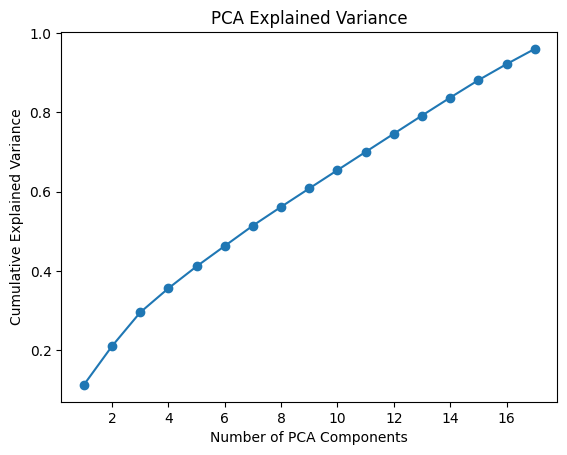

In [123]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


# Assuming crime_merged_data is already loaded
crime_merged_data_sample = crime_merged_data.sample(frac=1, random_state=42)

# Define features and multi-output targets
X = crime_merged_data_sample.drop(columns=["CrimeName", "Time_Range"])
y = crime_merged_data_sample[["CrimeName", "Time_Range"]]

# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA with 95% variance retention
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Plot PCA explained variance
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker='o')
plt.xlabel('Number of PCA Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.show()


Model Development

In [ ]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
import time
import numpy as np

# Initialize base XGBoost classifier
xgb_base = xgb.XGBClassifier(
    objective='multi:softmax',
    eval_metric='mlogloss',
    use_label_encoder=False
)

# Parameter Grid for RandomizedSearchCV
param_grid = {
    'estimator__n_estimators': [50, 100, 200],
    'estimator__learning_rate': [0.01, 0.1, 0.2],
    'estimator__max_depth': [3, 6, 9],
    'estimator__subsample': [0.6, 0.8, 1.0],
    'estimator__colsample_bytree': [0.6, 0.8, 1.0]
}

# Create MultiOutputClassifier
multi_output_xgb = MultiOutputClassifier(xgb_base)

# Create RandomizedSearchCV
random_search = RandomizedSearchCV(
    multi_output_xgb,
    param_distributions=param_grid,
    n_iter=30,
    cv=3,
    scoring='accuracy',
    verbose=0,  # Suppress internal verbosity
    n_jobs=-1
)

# Start timer for search process
print("Starting Randomized Search...")

start_time = time.time()

# Perform RandomizedSearchCV fitting
random_search.fit(X_train_pca, y_train)

end_time = time.time()
print(f"\nRandomized Search Completed in {(end_time - start_time) / 60:.2f} minutes")

# Get the best parameters
best_params = random_search.best_params_
print("\nBest Parameters:", best_params)

# Predict on test data using the best estimator
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_pca)

# Evaluate the model
accuracy_crime = accuracy_score(y_test["CrimeName"], y_pred[:, 0])
accuracy_time = accuracy_score(y_test["Time_Range"], y_pred[:, 1])

print(f"\nCrimeName Prediction Accuracy: {accuracy_crime:.4f}")
print(f"TimeRange Prediction Accuracy: {accuracy_time:.4f}")

# Classification reports
print("\nClassification Report for CrimeName:")
print(classification_report(y_test["CrimeName"], y_pred[:, 0]))

print("\nClassification Report for TimeRange:")
print(classification_report(y_test["Time_Range"], y_pred[:, 1]))


Starting Randomized Search...
